•	Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

•	Plot bar charts showing impact of employee salaries on retention

•	Plot bar charts showing corelation between department and employee retention

•	Now build logistic regression model using variables that were narrowed down in step 1

•	Measure the accuracy of the model


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/HR_comma_sep.csv')

<ipython-input-3-d784cebfb326>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


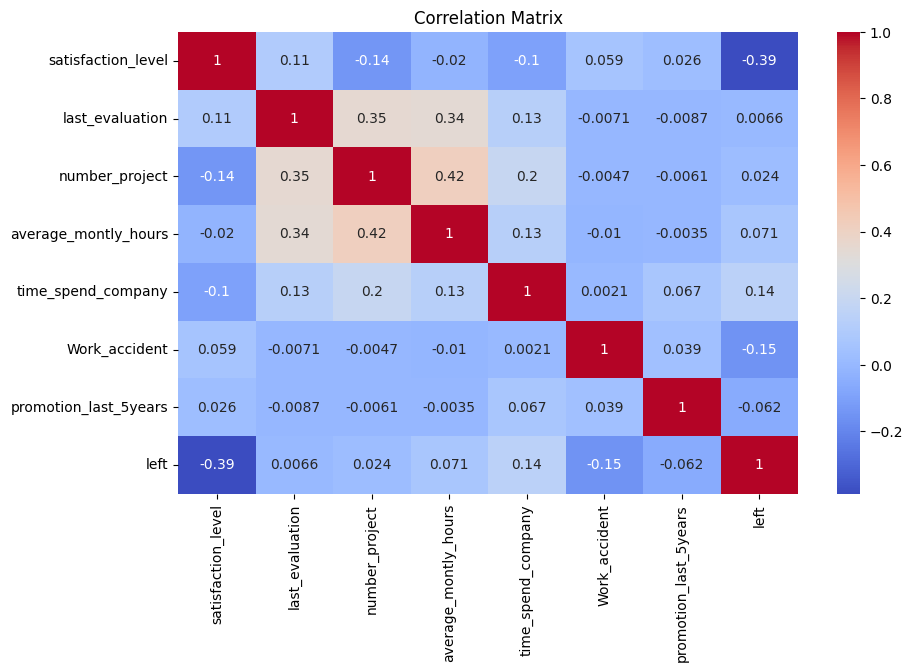

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

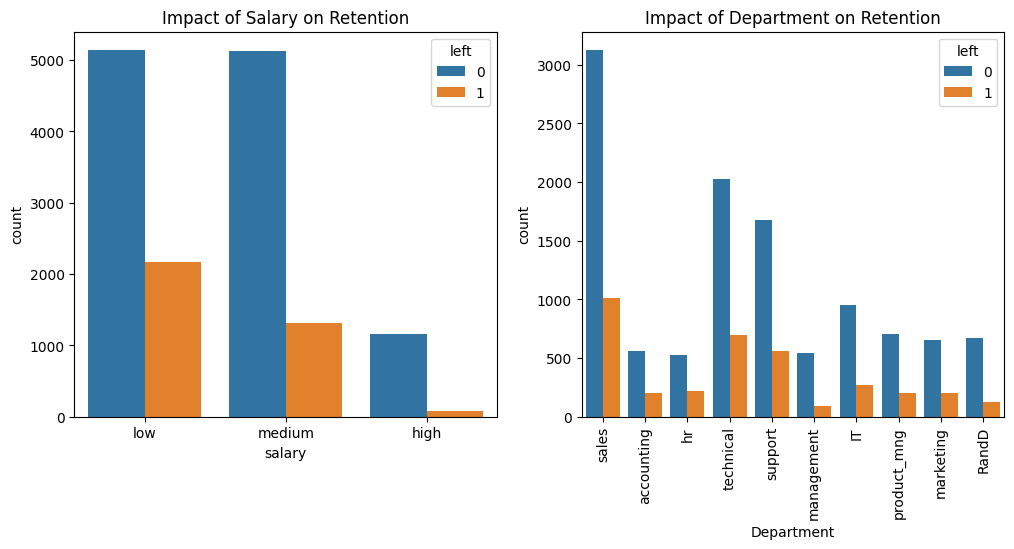

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='salary', hue='left', data=data)
plt.title('Impact of Salary on Retention')
plt.subplot(1, 2, 2)
sns.countplot(x='Department', hue='left', data=data)
plt.xticks(rotation=90)
plt.title('Impact of Department on Retention')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project',
          'average_montly_hours', 'time_spend_company', 'Work_accident',
          'promotion_last_5years', 'salary', 'Department']]

In [ ]:
X = pd.get_dummies(X, columns=['salary', 'Department'], drop_first=True)

In [ ]:
y = data['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      2294
           1       0.56      0.32      0.40       706

    accuracy                           0.78      3000
   macro avg       0.69      0.62      0.63      3000
weighted avg       0.75      0.78      0.76      3000

